<a href="https://colab.research.google.com/github/Ruswantomo/PA-DATMIN-C2-KEL-2/blob/main/Supervised_C2_K2_PADATMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis Menggunakan STRUKTUR CRISP-DM

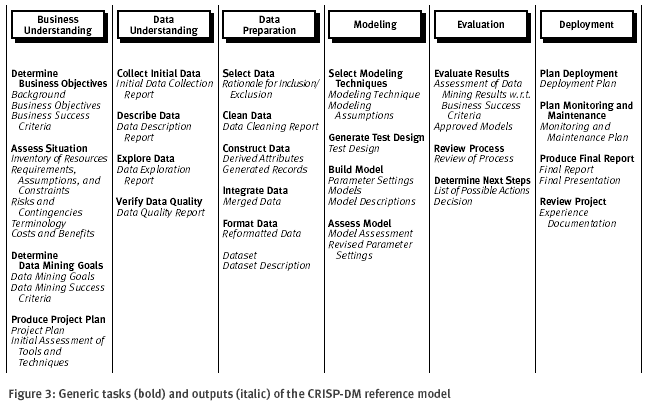

# Business Understanding

Sumber Dataset : https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set

**Tujuan penggunaan dataset** : untuk melakukan analisis dan pemodelan data dengan tujuan memahami perilaku pelanggan grosir (wholesale customers) berdasarkan pembelian produk. Dataset ini terdiri dari informasi pembelian produk oleh pelanggan grosir dari kategori produk yang berbeda seperti bahan makanan (grocery), susu (milk), produk segar (fresh), dan produk beku (frozen).

**Tujuan perusahaan :** untuk memahami perilaku pembelian pelanggan grosir dengan lebih baik, sehingga dapat mengembangkan strategi pemasaran yang lebih efektif dan efisien. Dengan memahami preferensi pelanggan dan pola pembeliannya, perusahaan dapat mengoptimalkan rantai pasokan, menyesuaikan stok dan persediaan, serta mengembangkan produk dan layanan yang lebih sesuai dengan kebutuhan pelanggan. 

**Tujuan memakai data mining :**  untuk mengeksplorasi dan menganalisis data pembelian pelanggan grosir untuk mengidentifikasi pola dan tren yang tersembunyi, serta mengambil informasi penting yang dapat membantu perusahaan dalam pengambilan keputusan bisnis yang lebih baik.

# Data Understanding

## Persiapan Data

In [ ]:
# Import Library
# Untuk tabulasi dan analisis
import pandas as pd

# Untuk kalkulasi
import numpy as np
import math as math

# Untuk visualisasi
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [ ]:
link_file = "https://raw.githubusercontent.com/arntka110/dataset-wholesale-customers/main/Wholesale_customers.csv"

## Collect Initial Data

In [ ]:
# Untuk mengkoneksikan suatu data dari dalam file csv
df = pd.read_csv(link_file)

In [ ]:
# Melihat data
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
# Menampilkan sample data 
df.sample()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
175,2,3,2343,7845,11874,52,4196,1697


In [ ]:
# Menampilkan 10 contoh sample data
df.sample(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
94,2,3,5626,12220,11323,206,5038,244
167,1,3,2926,3195,3268,405,1680,693
411,1,3,2126,3289,3281,1535,235,4365
376,2,3,3136,8630,13586,5641,4666,1426
195,1,3,17023,5139,5230,7888,330,1755
1,2,3,7057,9810,9568,1762,3293,1776
79,1,3,1640,3259,3655,868,1202,1653
80,1,3,7005,829,3009,430,610,529
212,1,1,7291,1012,2062,1291,240,1775
170,2,3,260,8675,13430,1116,7015,323


In [ ]:
# menampilkan beberapa baris pertama (defaultnya 5 baris) dari sebuah DataFrame
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#Menampilkan data 5 baris terakhir
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
# Menampilkan nilai rata-rata, min, max, dan standar deviasi untuk kolom Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen	

def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())
  print("Nilai standar deviasi :", dfnum.std())
  print("Nilai mean            :", dfnum.mean())

In [ ]:
tampil("Fresh")

Nilai minimum         : 3
Nilai maksimum        : 112151
Nilai standar deviasi : 12647.328865076892
Nilai mean            : 12000.297727272728


In [ ]:
tampil("Milk")

Nilai minimum         : 55
Nilai maksimum        : 73498
Nilai standar deviasi : 7380.377174570841
Nilai mean            : 5796.265909090909


In [ ]:
tampil("Grocery")

Nilai minimum         : 3
Nilai maksimum        : 92780
Nilai standar deviasi : 9503.162828994344
Nilai mean            : 7951.277272727273


In [ ]:
tampil("Frozen")

Nilai minimum         : 25
Nilai maksimum        : 60869
Nilai standar deviasi : 4854.673332592366
Nilai mean            : 3071.931818181818


In [ ]:
tampil("Detergents_Paper")

Nilai minimum         : 3
Nilai maksimum        : 40827
Nilai standar deviasi : 4767.854447904201
Nilai mean            : 2881.4931818181817


In [ ]:
tampil("Delicassen")

Nilai minimum         : 3
Nilai maksimum        : 47943
Nilai standar deviasi : 2820.105937369397
Nilai mean            : 1524.8704545454545


## Describe Data

1. Describe column
2. Describe data secara keseluruhan

**Describe column**

Dataset ini memiliki beberapa kolom atau kriteria-kriteria yang ada dari informasi pembelian produk oleh pelanggan, kolom-kolom yang ada diantaranya:

1. **Channel** : Kategori saluran distribusi yang digunakan oleh pelanggan, yaitu Hotel/Restaurant/Cafe (Horeca) atau Retail.
2. **Region** : Daerah geografis yang dilayani oleh pelanggan.
3. **Fresh** : Jumlah pembelian produk segar
4. **Milk** : Jumlah pembelian produk susu
5. **Grocery** : Jumlah pembelian produk bahan makanan
6. **Frozen** : Jumlah pembelian produk beku 
7. **Detergents_Paper** : Jumlah pembelian produk deterjen dan kertas
8. **Delicassen** : Jumlah pembelian produk daging, keju, dan makanan ringan

**Describe Data Secara Keseluruhan**

In [ ]:
# Menampilkan data secara rinci
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# Untuk lihat lebih jelas banyak kolom dan baris
df.shape

#Pada data ini terdapat 440 baris dan 8 kolom

(440, 8)

## Explore Data

In [ ]:
# Tampilkan Data
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


### Visualisasi Comparison

<Axes: xlabel='Channel', ylabel='count'>

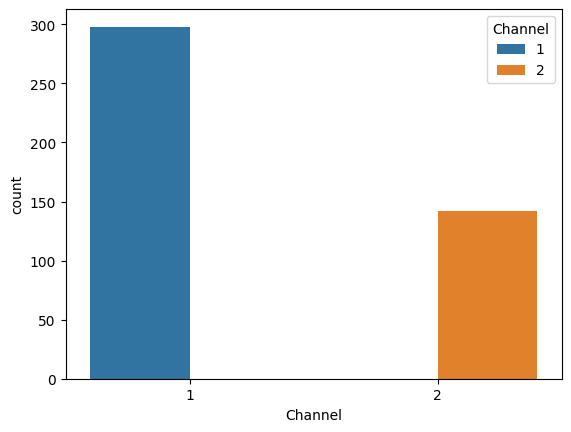

In [ ]:
# Visualisasi perbandingan Channel yang bernilai 1 dan Channel yang bernilai 2
sns.countplot(data = df,x="Channel", hue="Channel")

Dari data yang ditampilkan, nilai Channel 1 lebih mendominasi yaitu dengan jumlah 300 sedabgkan nilai Channel 2 berjumlah 150.

### Visualisasi Distribution

In [ ]:
# Membuat Visualisasi histogram Delicassen
px.histogram(df,x="Delicassen")

Dari data yang ditampilkan, grafik yang ditampilkan menurun.

###Visualisasi Relationship

In [ ]:
# Scatterplot untuk kolom Fresh dan Frozen (Produk Beku)
px.scatter(df,x="Fresh",color="Frozen",title="Scatterplot Fresh dan Frozen")

####Penjelasan Visualisasi Relationship

Menunjukkan korelasi dalam bentuk Scatterplot dalam hubungan antara nilai Fresh (Produk Segar) dengan nilai Frozen (Produk Beku)




### Visualisasi Composition

In [ ]:
# Pieplot untuk Channel
px.pie(df,names="Channel",title="Diagram Pie Channel")

# Data Preparation

###Select Data

Select data adalah bagian menentukan dataset yang akan digunakan apabila terdapat banyak dataset-nya. **Data utama** yang digunakan bersumber dari tabel Wholesale Customers data.csv

In [ ]:
# Tampilkan data
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
# Membuat hanya menampikan 2 Kolom yaitu Fresh dan Frozen
selected_data = df[["Fresh", "Frozen"]]

# Menampilkan Perintah
print(selected_data.head())

   Fresh  Frozen
0  12669     214
1   7057    1762
2   6353    2405
3  13265    6404
4  22615    3915


###DataType

In [ ]:
# Cek datatype
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [ ]:
# Atau dapat menggunakan sintaks df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Collect Data

In [ ]:
# Import Library
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Cleaning Data

In [ ]:
# Menampilkan data
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
# Cek datatype
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [ ]:
# Atau dapat menggunakan sintaks df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
# Untuk menampilkan banyaknya data (440)
len(df)

440

### Handling Missing Value

In [ ]:
# Menghapus data yang bernilai NaN
df_dropna = df.dropna()

In [ ]:
# Untuk menampilkan banyaknya data yang bernilai null dan tidak null
df_dropna.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Pada data diatas tidak terdapat data yang kosong sehingga langkah ini tidak perlu dilakukan

### Handling Duplicate Data

In [ ]:
df_dropna[df_dropna.duplicated()]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Pada data diatas tidak terdapat data yang duplikat sehingga langkah ini tidak perlu dilakukan

### Handling Outlier

In [ ]:
df_dropna

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
cols = df_dropna.select_dtypes(include=['int64'])

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df_dropna[col].quantile(0.25)
    q3 = df_dropna[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df_dropna[(df_dropna[col] < lower_bound) | (df_dropna[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df_dropna))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Channel,0.000000
Region,0.000000
Fresh,4.545455
Milk,6.363636
Grocery,5.454545
Frozen,9.772727
Detergents_Paper,6.818182
Delicassen,6.136364


In [ ]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df_dropna[col].quantile(0.25)
    q3 = df_dropna[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df_dropna[(df_dropna[col] < lower_bound) | (df_dropna[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df_dropna))*100
    if percent_outliers < 10:
      df_dropna = df_dropna[~((df_dropna[col] > upper_bound) | (df_dropna[col] < lower_bound))]
    outliers_after = df_dropna[(df_dropna[col] < lower_bound) | (df_dropna[col] > upper_bound)]
    percent_outliers_after = (len(outliers_after)/len(df_dropna))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers_after})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Fresh,0.0
Milk,0.0
Grocery,0.0
Frozen,0.0
Detergents_Paper,0.0
Delicassen,0.0


In [ ]:
df2 = df_dropna

In [ ]:
# Mengubah nilai-nilai kategorikal menjadi numerik menggunakan Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df2['Channel'] = label_encoder.fit_transform(df2['Channel'])

In [ ]:
df2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,12669,9656,7561,214,2674,1338
1,1,3,7057,9810,9568,1762,3293,1776
3,0,3,13265,1196,4221,6404,507,1788
5,1,3,9413,8259,5126,666,1795,1451
6,1,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,0,3,21117,1162,4754,269,1328,395
433,0,3,1982,3218,1493,1541,356,1449
434,0,3,16731,3922,7994,688,2371,838
438,0,3,10290,1981,2232,1038,168,2125


In [ ]:
df2.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

## Format Data

In [ ]:
# Slicing Data
df_sliced = df2.sample(n=220, random_state=42)

In [ ]:
# Split data
x = df_sliced.drop('Channel',axis=1)
y = df_sliced['Channel']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# definisikan model KNN
clf = KNeighborsClassifier()

# definisikan hyperparameter yang ingin diuji
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]}

# inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# latih model dengan GridSearchCV
grid_search.fit(x_train, y_train)

# tampilkan parameter terbaik
print("Nilai k terbaik:", grid_search.best_params_['n_neighbors'])

# tampilkan skor validasi terbaik
print("Skor validasi:", grid_search.best_score_)

Nilai k terbaik: 19
Skor validasi: 0.8832258064516129


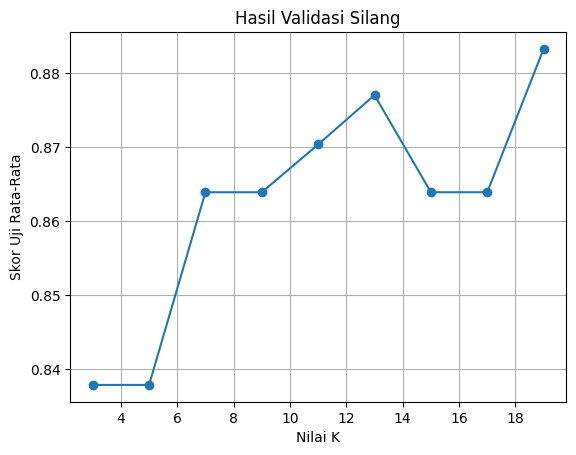

In [ ]:
# ambil nilai skor validasi dari grid search
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# plot hasil dari grid search
plt.errorbar(
    [params[i]['n_neighbors'] for i in range(len(params))],
    mean_scores,
    fmt='o-'
)
plt.xlabel('Nilai K')
plt.ylabel('Skor Uji Rata-Rata')
plt.title('Hasil Validasi Silang')
plt.grid(True)
plt.show()

#Modeling

###Preprocessing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [ ]:
# Lakukan scaling pada data train
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Gunakan objek scaler yang sama untuk melakukan scaling pada data test
x_test_scaled = scaler.transform(x_test)

## Algoritma

### KNN

K-nearest neighbors atau KNN adalah algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (train data sets), yang diambil dari k tetangga terdekatnya (nearest neighbors). Dengan k merupakan banyaknya tetangga terdekat.

Pada analisis prediksi data credit card, algoritma KNN akan mencari data pada tipe kontrak lain yang memiliki faktor-faktor yang mirip dengan tipe kontrak yang akan diprediksi dan menentukan kemungkinan termasuk kedalam cash loan atau revolving loans berdasarkan faktor tipe kontrak terdekat.

nnti diedit

In [ ]:
class KNeighbors:
    def __init__(self, n_neighbors=None):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        
    def predict(self, X_test):
        X_test = np.array(X_test)
        y_pred = np.zeros(X_test.shape[0], dtype=self.y_train.dtype)
        for i, x_test in enumerate(X_test):
            distances = np.sqrt(np.sum((self.X_train - x_test)**2, axis=1))
            indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_classes = self.y_train[indices]
            y_pred[i] = np.argmax(np.bincount(k_nearest_classes))
        return y_pred

In [ ]:
# Inisialisasi model KNN dengan k=15
knn = KNeighborsClassifier(n_neighbors=15)
# Train model menggunakan data train
knn.fit(x_train_scaled, y_train)

# Prediksi label pada data test
knn_pred = knn.predict(x_test_scaled)

### Naive Bayes

Naive bayes merupakan metode pengklasifikasian berdasarkan probabilitas sederhana dan dirancang agar dapat dipergunakan dengan asumsi antar variabel penjelas saling bebas (independen). Pada algoritma ini pembelajaran lebih ditekankan pada pengestimasian probabilitas. Keuntungan algoritma naive bayes adalah tingkat nilai error yang didapat lebih rendah ketika dataset berjumlah besar, selain itu akurasi naive bayes dan kecepatannya lebih tinggi pada saat diaplikasikan ke dalam dataset yang jumlahnya lebih besar.

In [ ]:
# definisikan model Naive Bayes
gnb = GaussianNB()

# Gunakan objek scaler yang sama untuk melakukan scaling pada data test
x_test_scaled = scaler.transform(x_test)

# latih model Naive Bayes
gnb.fit(x_train_scaled, y_train)

# evaluasi performa model menggunakan data uji
gnb_pred = gnb.predict(x_test_scaled)

### C4.5

Algoritma C4.5 merupakan algoritma yang digunakan untuk membentuk pohon keputusan (Decision Tree). C4.5 bekerja dengan membagi dataset menjadi subset yang lebih kecil dan homogen berdasarkan fitur-fitur yang memiliki informasi paling tinggi, dan kemudian membuat keputusan berdasarkan aturan-aturan yang ditemukan pada tree.

In [ ]:
# inisialisasi model Decision Tree Classifier
dtc = DecisionTreeClassifier()

# train model pada data train
dtc.fit(x_train_scaled, y_train)

# evaluasi model pada data test
dtc_pred = dtc.predict(x_train_scaled)

# Evaluation

Evaluasi pada analisis ini akan dilakukan menggunakan confusion matrix. Confusion matrix merupakan sebuah matriks yang digunakan untuk mengevaluasi kinerja model klasifikasi dengan membandingkan nilai aktual dan prediksi dari suatu model. Terdapat empat nilai dalam confusion matrix, yaitu True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN).

Dari nilai-nilai ini, kita dapat menghitung akurasi, presisi, dan recall. Akurasi merupakan rasio prediksi yang benar dari semua prediksi. Presisi merupakan rasio prediksi yang benar positif dari semua prediksi positif. Recall merupakan rasio prediksi yang benar positif dari semua kasus positif yang sebenarnya.

Apabila hasil dari akurasi, presisi, dan recall mendekati 1, maka akan semakin baik kinerja model yang digunakan.

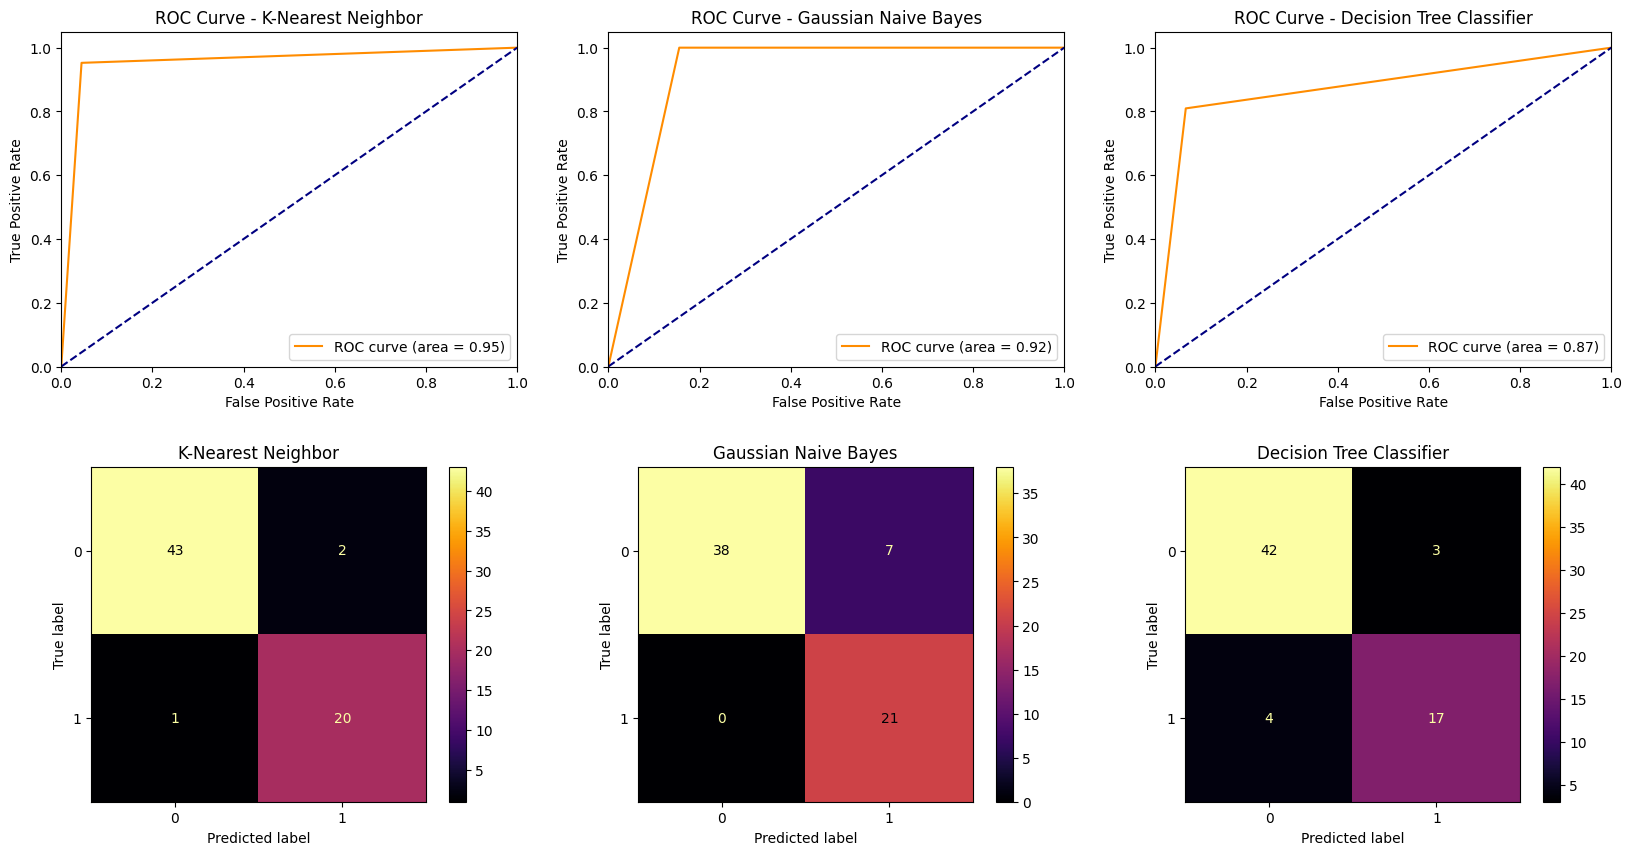

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
K-Nearest Neighbor,95.454545,90.909091,95.238095,95.396825,93.023256
Gaussian Naive Bayes,89.393939,75.000000,100.000000,92.222222,85.714286
Decision Tree Classifier,89.393939,85.000000,80.952381,87.142857,82.926829


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# buat list model dan nama model
models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# loop untuk setiap model
for i, model in enumerate(models):
    # prediksi target variabel pada data uji
    y_pred = model.predict(x_test_scaled)

    # hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # tampilkan kurva roc
    roc_display = axes[0,i].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0,i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0,i].set_xlim([0.0, 1.0])
    roc_display = axes[0,i].set_ylim([0.0, 1.05])
    roc_display = axes[0,i].set_xlabel('False Positive Rate')
    roc_display = axes[0,i].set_ylabel('True Positive Rate')
    roc_display = axes[0,i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0,i].legend(loc="lower right")

    # tambahkan baris kosong
    fig.subplots_adjust(hspace=0.3)

    # tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1,i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # hitung precision dan recall
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = 2*pr*rc / (pr+rc)

    # simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# tampilkan visualisasi
plt.show()

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)

# Deployment

In [ ]:
df2.to_csv('wholesale_customers_deployment.csv', index=False)